In [1]:
from pathlib import Path
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

from maxent_gan.utils.general_utils import ROOT_DIR

sns.set_theme()


SMALL_SIZE = 18
MEDIUM_SIZE = 20
BIGGER_SIZE = 22 #18

plt.rc("font", size=SMALL_SIZE)  # controls default text sizes
plt.rc("axes", titlesize=MEDIUM_SIZE)  # fontsize of the axes title
plt.rc("axes", labelsize=MEDIUM_SIZE)  # fontsize of the x and y labels
plt.rc("xtick", labelsize=SMALL_SIZE)  # fontsize of the tick labels
plt.rc("ytick", labelsize=SMALL_SIZE)  # fontsize of the tick labels
plt.rc("legend", fontsize=SMALL_SIZE)  # legend fontsize
plt.rc("lines", linewidth=3)
plt.rc("figure", titlesize=BIGGER_SIZE)  # fontsize of the figure title


2022-07-12 20:40:59.689690: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [2]:
def ema(s, n):
    """
    returns an n period exponential moving average for
    the time series s

    s is a list ordered from oldest (index 0) to most
    recent (index -1)
    n is an integer

    returns a numeric array of the exponential
    moving average
    """
    s = np.array(s)
    ema = []
    j = 1

    #get n sma first and calculate the next n period ema
    sma = sum(s[:n]) / n
    multiplier = 2 / float(1 + n)
    ema.append(sma)

    #EMA(current) = ( (Price(current) - EMA(prev) ) x Multiplier) + EMA(prev)
    ema.append(( (s[n] - sma) * multiplier) + sma)

    #now calculate the rest of the values
    for i in s[n+1:]:
        tmp = ( (i - ema[j]) * multiplier) + ema[j]
        j = j + 1
        ema.append(tmp)

    return ema

In [3]:
seeds = [44, 45, 46]
exp_paths = ['log/dumb_feature_DiscriminatorTarget_train/dcgan_vanilla_44', 
'log/dumb_feature_DiscriminatorTarget_train/dcgan_meta_44',
]
names = [
    r'$ Vanilla GAN$', 
    r'$Meta GAN$',
]
colors = [
    'g', 
    'b'
]

In [4]:
eval_every = 2500

Text(0.5, 0, 'Iteration')

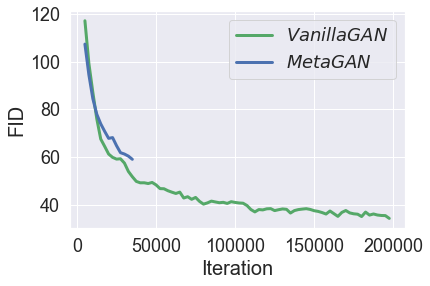

In [5]:
for name, color, path in zip(names, colors, exp_paths):
    vals = np.loadtxt(Path(ROOT_DIR, path, 'fid.txt'))
    n = 3
    vals = ema(vals, n)
    start = 0
    vals = vals[start:]
    plt.plot(np.arange((start+n-1), (len(vals)+(start+n-1)), 1)*eval_every, vals, label=name, color=color)#, marker='o')
    
plt.legend()
plt.ylabel('FID')
plt.xlabel('Iteration')
# plt.xscale('log', base=10)

Text(0.5, 0, 'Iteration')

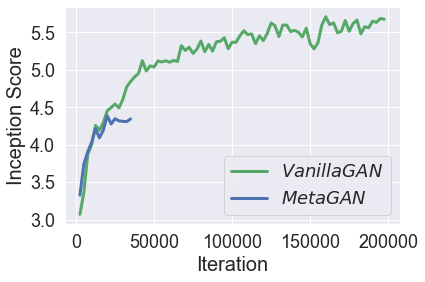

In [6]:
for name, color, path in zip(names, colors, exp_paths):
    vals = np.loadtxt(Path(ROOT_DIR, path, 'inception_score.txt'))
    n = 2
    vals = ema(vals, n)
    start = 0
    vals = vals[start:]
    plt.plot(np.arange((start+n-1), (len(vals)+(start+n-1)), 1)*eval_every, vals, label=name, color=color)#, marker='o')
    
plt.legend()
plt.ylabel('Inception Score')
plt.xlabel('Iteration')
# plt.xscale('log', base=10)